In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf

# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

2 5 1


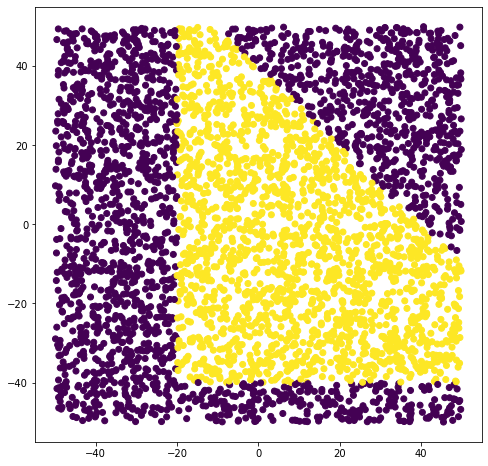

In [2]:
import numpy as np

# a nonlinear function of a 2d array x
def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            r=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    return r


def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

perc_train = 0.8
batch_size = 50

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


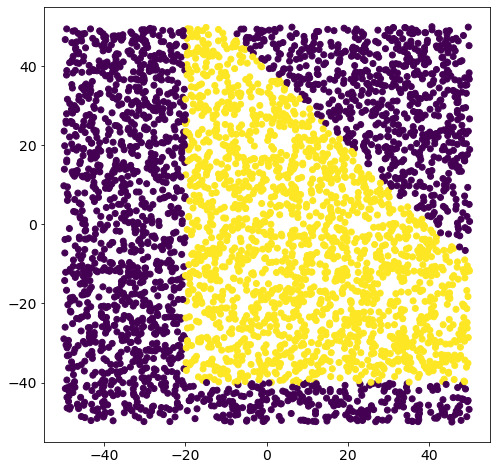

In [6]:
import numpy as np
import os
TYPE = 1
x = np.loadtxt(filename("data",TYPE), delimiter=" ")
y = np.loadtxt(filename("labels",TYPE), delimiter=" ")

# dim of sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i], y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [7]:
(x_train, y_train) = (x[0:N_train], y[0:N_train])
(x_valid, y_valid) = (x[N_train:], y[N_train:])
print("Train:", len(x_train), "\t Validation:", len(x_valid))





Train: 3200 	 Validation: 800


In [8]:
#ans4

#Standardization(first method)
def Rescale(x):
    # return (x - x.mean())/np.sqrt(x.var())
    return x/(B/2)
x_train1 = Rescale(x_train)
x_valid1 = Rescale(x_valid)

#min_max rescaling(secodn method)
def Rescale2(x):
  return (x - np.max(x))/( np.max(x) - np.min(x))
x_train2 = Rescale2(x_train)
x_valid2 = Rescale2(x_valid)


# x/ max(in a column)(third method)
def Rescale3(x):
  X= x.copy()
  for i in [0,1]:
    for j in range(len(X)):
      if i == 0:
        X[j, i] = X[j, i] / np.max(X[:, i])
      else :
        X[j, i] = X[j, i] / np. max(X[:, i])
  return X

x_train3 = Rescale3(x_train)
x_valid3 = Rescale3(x_valid)


fig, ax = plt.subplots(1, 3, figsize = (300, 150))
ax[0].hist(x_train1, bins = 500)
ax[0].set_title('first Rescaling method')
ax[1].hist(x_train2, bins = 500)
ax[1].set_title('second Rescalig method')
ax[2].hist(x_train3, bins = 500)
ax[2].set_title('third Rescaling method')
plt.show()


print('volatility of first : ', np.std(x_train1))
print('volatility of second : ', np.std(x_train2))
print('volatility of third : ', np.std(x_train3))

print('\n', 'the best choice of rescaling for this amount of data is the second')


volatility of first :  0.5767417983028844
volatility of second :  0.28840964544991493
volatility of third :  0.5789090997227687

 the best choice of rescaling for this amount of data is the second


In [9]:
def Rescale(x):
    # return (x - x.mean())/np.sqrt(x.var())
    return x/(B/2)
x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [11]:
np.random.seed(12345)
#def create_model(case = 1, optimizer = "adam", dropout_rate = 0.2, n_layers = 2,
#                 activation = 'relu', neurons = 20):

#regular set with random initial weights random_normal
#different choice glorot_uniform
#random_uniform
#zeros
# initial = tf.keras.initializers.RandoNormal(mean=0. , stdev=1. , seed =12345)
def create_DNN(case = 1):
  if case == 1:
      model = Sequential()
      model.add(Dense(L, input_shape=(L,), activation='relu', kernel_initializer='glorot_uniform'))
      model.add(Dense(20, activation='relu', kernel_initializer='glorot_uniform'))
      model.add(Dense(20, activation='relu', kernel_initializer='glorot_uniform'))
      model.add(Dropout(0.2))
      model.add(Dense(1, activation='sigmoid'))
      nepoch = 400
  if case == 2:
      model = Sequential()
      model.add(Dense(L, input_shape=(L,), activation='sigmoid'))
      model.add(Dense(3, activation='sigmoid'))
      model.add(Dense(1, activation='sigmoid'))
      nepoch = 400



  return model

#model  = create_model(case = 1, optimizer = "adam",dropout_rate = 0.2,n_layers = 2,
#                      activation = 'relu', neurons = 20)

#model.summary()



In [12]:
loss = 'binary_crossentropy' 
optimizer = 'adam'           
metrics = ['accuracy']
def compile_model(case = 1, optimizer = "adam",dropout_rate = 0.2,n_layers = 2,
                      activation = 'relu', neurons = 20):
    # create the model
    model=create_DNN(case=case)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                 optimizer=optimizer,
                metrics=['accuracy'])
    
    model.save_weights('initial_weights.txt')

    return model

model = compile_model()

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________


In [13]:
initial_weights = model.get_weights()
model.save_weights('initial_weights.txt')

print(initial_weights)

fit = model.fit(x_train, y_train, epochs=400, batch_size=50, validation_data=(x_valid, y_valid),
               verbose=2)

[array([[ 1.0290917 , -0.33591026],
       [-0.3277415 ,  0.8414177 ]], dtype=float32), array([0., 0.], dtype=float32), array([[ 0.46467495, -0.3647315 , -0.3432312 , -0.09750867, -0.28811002,
         0.49604136, -0.23915341, -0.1758906 ,  0.31604034, -0.15791023,
         0.5047117 ,  0.40100038, -0.21691903,  0.15867263,  0.13264626,
        -0.1273424 , -0.24896565,  0.16513091, -0.01743913,  0.14545113],
       [-0.22482502, -0.09156069,  0.13882571,  0.5176371 , -0.1917741 ,
        -0.49994963, -0.24185738, -0.20944008, -0.25182542,  0.03927743,
         0.4219669 ,  0.3951764 , -0.34845567, -0.2148844 ,  0.4456936 ,
         0.05218166,  0.24294561,  0.22060686,  0.08385527, -0.16874671]],
      dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32), array([[ 3.31681728e-01, -1.05466038e-01, -2.21567631e-01,
         3.26583505e-01, -2.80561626e-01,  1.01678401e-01,
         1.65980577e-01, -3.56348574e-01, 

In [ ]:
history = model.fit(x_train, y_train, epochs=400, batch_size=50, validation_data=(x_valid, y_valid))

Epoch 1/400
64/64 [==============================] - 1s 10ms/step - loss: 0.0299 - accuracy: 0.9869 - val_loss: 0.0149 - val_accuracy: 0.9937
Epoch 2/400
64/64 [==============================] - 1s 11ms/step - loss: 0.0283 - accuracy: 0.9894 - val_loss: 0.0130 - val_accuracy: 0.9975
Epoch 3/400
64/64 [==============================] - 1s 9ms/step - loss: 0.0256 - accuracy: 0.9906 - val_loss: 0.0128 - val_accuracy: 0.9962
Epoch 4/400
64/64 [==============================] - 1s 9ms/step - loss: 0.0288 - accuracy: 0.9887 - val_loss: 0.0192 - val_accuracy: 0.9900
Epoch 5/400
64/64 [==============================] - 1s 10ms/step - loss: 0.0299 - accuracy: 0.9878 - val_loss: 0.0170 - val_accuracy: 0.9937
Epoch 6/400
64/64 [==============================] - 1s 10ms/step - loss: 0.0280 - accuracy: 0.9887 - val_loss: 0.0117 - val_accuracy: 0.9975
Epoch 7/400
64/64 [==============================] - 1s 10ms/step - loss: 0.0253 - accuracy: 0.9909 - val_loss: 0.0115 - val_accuracy: 0.9962
Epoch 8/

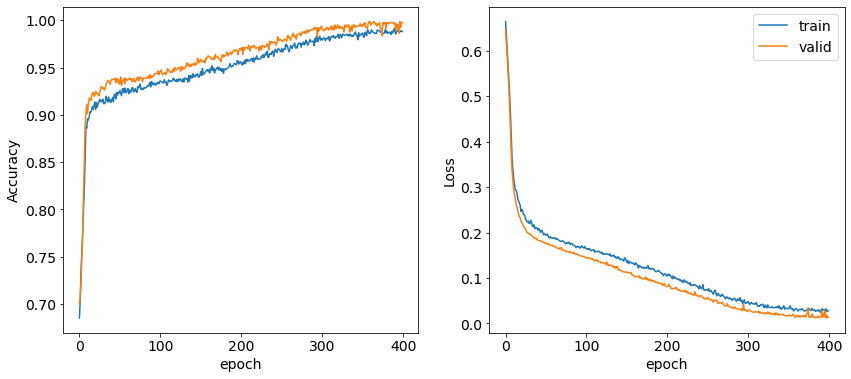

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid")
ax.set_xlabel('epoch')
ax.set_ylabel('Accuracy')
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid")
ax.set_xlabel('epoch')
ax.set_ylabel('Loss')
ax.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers
from tensorflow.keras import activations
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from keras.constraints import maxnorm

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model,epochs=1, verbose=1)

#other parameters
activations = [ 'sigmoid','relu','elu']
dropout_rates = [ 0.2, 0.4, 0.6]
n_layers=[4,6,8]
neurons = [20, 25, 30]
#batch_size = [50,70,90]
#epochs = [200, 400, 500]


# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adam', 'Adagrad', 'Adadelta','Adamax', 'Nadam']
# define parameter dictionary
#param_grid = dict( epochs=epochs, batch_size=batch_size)
param_grid = dict(optimizer=optimizer)#dict(optimizer=optimizer,activation=activations, n_layers=n_layers, neurons=neurons, dropout_rate=dropout_rates)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  del sys.path[0]
100/100 [==============================] - 2s 9ms/step - loss: 0.6077 - accuracy: 0.6562 - val_loss: 0.5689 - val_accuracy: 0.7375
Best: 0.655625 using {'optimizer': 'RMSprop'}
0.632812 (0.053300) with: {'optimizer': 'SGD'}
0.655625 (0.069065) with: {'optimizer': 'RMSprop'}
0.598750 (0.072495) with: {'optimizer': 'Adam'}
0.497812 (0.075660) with: {'optimizer': 'Adagrad'}
0.551250 (0.034494) with: {'optimizer': 'Adadelta'}
0.607813 (0.041555) with: {'optimizer': 'Adamax'}
0.639375 (0.074059) with: {'optimizer': 'Nadam'}


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.655625 using {'optimizer': 'RMSprop'}
0.632812 (0.053300) with: {'optimizer': 'SGD'}
0.655625 (0.069065) with: {'optimizer': 'RMSprop'}
0.598750 (0.072495) with: {'optimizer': 'Adam'}
0.497812 (0.075660) with: {'optimizer': 'Adagrad'}
0.551250 (0.034494) with: {'optimizer': 'Adadelta'}
0.607813 (0.041555) with: {'optimizer': 'Adamax'}
0.639375 (0.074059) with: {'optimizer': 'Nadam'}


In [ ]:
param_grid = dict(optimizer=optimizer,activation=activations)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

100/100 [==============================] - 1s 5ms/step - loss: 0.6485 - accuracy: 0.6222 - val_loss: 0.6060 - val_accuracy: 0.7600
Best: 0.666875 using {'activation': 'relu', 'optimizer': 'RMSprop'}
0.518750 (0.038619) with: {'activation': 'sigmoid', 'optimizer': 'SGD'}
0.633437 (0.036103) with: {'activation': 'sigmoid', 'optimizer': 'RMSprop'}
0.617813 (0.041442) with: {'activation': 'sigmoid', 'optimizer': 'Adam'}
0.519375 (0.089889) with: {'activation': 'sigmoid', 'optimizer': 'Adagrad'}
0.472813 (0.059931) with: {'activation': 'sigmoid', 'optimizer': 'Adadelta'}
0.585938 (0.063236) with: {'activation': 'sigmoid', 'optimizer': 'Adamax'}
0.600000 (0.038334) with: {'activation': 'sigmoid', 'optimizer': 'Nadam'}
0.504063 (0.085688) with: {'activation': 'relu', 'optimizer': 'SGD'}
0.666875 (0.021167) with: {'activation': 'relu', 'optimizer': 'RMSprop'}
0.631563 (0.063826) with: {'activation': 'relu', 'optimizer': 'Adam'}
0.501250 (0.190528) with: {'activation': 'relu', 'optimizer': 'Ada

In [ ]:
param_grid = dict(optimizer=optimizer,activation=activations,dropout_rate=dropout_rates)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

100/100 [==============================] - 1s 5ms/step - loss: 0.6852 - accuracy: 0.5728 - val_loss: 0.6676 - val_accuracy: 0.6775
Best: 0.694688 using {'activation': 'sigmoid', 'dropout_rate': 0.6, 'optimizer': 'RMSprop'}
0.575938 (0.057121) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'SGD'}
0.644687 (0.048785) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'RMSprop'}
0.644375 (0.057245) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'Adam'}
0.514688 (0.086419) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'Adagrad'}
0.521875 (0.021911) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'Adadelta'}
0.595938 (0.058205) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'Adamax'}
0.640000 (0.038457) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'optimizer': 'Nadam'}
0.512812 (0.073492) with: {'activation': 'sigmoid', 'dropout_rate': 0.4, 'optimizer': 'SGD'}
0.665000 (0.04

In [ ]:
param_grid = dict(optimizer=optimizer,activation=activations, dropout_rate=dropout_rates, neurons=neurons)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

100/100 [==============================] - 1s 5ms/step - loss: 0.6790 - accuracy: 0.4872 - val_loss: 0.6376 - val_accuracy: 0.5750
Best: 0.700938 using {'activation': 'relu', 'dropout_rate': 0.6, 'neurons': 25, 'optimizer': 'RMSprop'}
0.526875 (0.098085) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'SGD'}
0.621250 (0.062979) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'RMSprop'}
0.592188 (0.075376) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'Adam'}
0.517812 (0.022885) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'Adagrad'}
0.532812 (0.100710) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'Adadelta'}
0.562500 (0.066374) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer': 'Adamax'}
0.631563 (0.031837) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'neurons': 20, 'optimizer':

In [ ]:
param_grid = dict(optimizer=optimizer,activation=activations, dropout_rate=dropout_rates, n_layers=n_layers,)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

100/100 [==============================] - 2s 6ms/step - loss: 0.6190 - accuracy: 0.5881 - val_loss: 0.5669 - val_accuracy: 0.7050
Best: 0.691250 using {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 6, 'optimizer': 'RMSprop'}
0.565625 (0.060857) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'SGD'}
0.675313 (0.069924) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'RMSprop'}
0.679688 (0.043015) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'Adam'}
0.447500 (0.095373) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'Adagrad'}
0.490000 (0.062519) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'Adadelta'}
0.592188 (0.061488) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimizer': 'Adamax'}
0.665937 (0.008119) with: {'activation': 'sigmoid', 'dropout_rate': 0.2, 'n_layers': 4, 'optimize

In [ ]:
results = pd.DataFrame.from_dict(grid_result.cv_results_)
results.to_csv('Grid_Search_Results.csv')
df_GridSearch = pd.read_csv('Grid_Search_Results.csv', index_col = False)
df_GridSearch = df_GridSearch.iloc[:,1:]
df_GridSearch.sort_values(by = "rank_test_score", ascending = True)
df_GridSearch

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=812bf338-8182-40ff-8f4b-1609d266eb77' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>